## **Problem Statement: Navigating the Data Science Job Landscape**

🚀 Unleash your creativity in crafting a solution that taps into the heartbeat of the data science job market! Envision an ingenious project that seamlessly wields cutting-edge web scraping techniques and illuminating data analysis.

🔍 Your mission? To engineer a tool that effortlessly gathers job listings from a multitude of online sources, extracting pivotal nuggets such as job descriptions, qualifications, locations, and salaries.

🧩 However, the true puzzle lies in deciphering this trove of data. Can your solution discern patterns that spotlight the most coveted skills? Are there threads connecting job types to compensation packages? How might it predict shifts in industry demand?

🎯 The core objectives of this challenge are as follows:

1. Web Scraping Mastery: Forge an adaptable and potent web scraping mechanism. Your creation should adeptly harvest data science job postings from a diverse array of online platforms. Be ready to navigate evolving website structures and process hefty data loads.

2. Data Symphony: Skillfully distill vital insights from the harvested job listings. Extract and cleanse critical information like job titles, company names, descriptions, qualifications, salaries, locations, and deadlines. Think data refinement and organization.

3. Market Wizardry: Conjure up analytical tools that conjure meaningful revelations from the gathered data. Dive into the abyss of job demand trends, geographic distribution, salary variations tied to experience and location, favored qualifications, and emerging skill demands.

4. Visual Magic: Weave a tapestry of visualization magic. Design captivating charts, graphs, and visual representations that paint a crystal-clear picture of the analyzed data. Make these visuals the compass that guides users through job market intricacies.

🌐 While the web scraping universe is yours to explore, consider these platforms as potential stomping grounds:

* LinkedIn Jobs
* Indeed
* Naukri
* Glassdoor
* AngelList

🎈 Your solution should not only decode the data science job realm but also empower professionals, job seekers, and recruiters to harness the dynamic shifts of the industry. The path is open, the challenge beckons – are you ready to embark on this exciting journey?






## We are extracting important Job details with Webscraping from the website www.timesjobs.com and collect all data in a file.

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv

# Number of pages to scrape
num_pages = 100

# Initialize empty lists for data
titles = []
companies = []
experiences = []
locations = []
salaries = []
descriptions = []
key_skills = []
walk_in_details = []

# Loop through the pages
for page in range(1, num_pages + 1):
    url = f"https://www.timesjobs.com/candidate/job-search.html?searchType=personalizedSearch&from=submit&txtKeywords=data+science&txtLocation=&pageNum={page}"
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
    response = requests.get(url, headers=headers).text
    soup = BeautifulSoup(response, "html.parser")

    job_list = soup.find_all("li", {"class": "clearfix job-bx wht-shd-bx"})

    for job in job_list:
        title = job.find('h2').text.strip()
        company = job.find('h3').text.strip().split('(')[0].strip()

        ul_tags1 = job.find('ul', class_='top-jd-dtl clearfix')
        li_tags1 = ul_tags1.find_all('li')

        if len(li_tags1) >= 3:
            experience = li_tags1[0].text.strip().split('_travel')[1].strip()
            salary = li_tags1[1].text.strip()
            location = li_tags1[2].text.strip().split('_on')[1].strip()
        elif len(li_tags1) == 2:
            experience = li_tags1[0].text.strip().split('_travel')[1].strip()
            salary = 'Not mentioned'
            location = li_tags1[1].text.strip().split('_on')[1].strip()
        else:
            experience = 'Not mentioned'
            salary = 'Not mentioned'
            location = 'Not mentioned'

        ul_tags2 = job.find('ul', class_='list-job-dtl clearfix')
        li_tags2 = ul_tags2.find_all('li')

        if len(li_tags2) >= 3:
            job_description = li_tags2[0].text.strip()
            key_skill = li_tags2[1].text.strip().split('Skills:')[1].strip()
            walk_in = li_tags2[2].text.strip()
        elif len(li_tags2) == 2:
            job_description = li_tags2[0].text.strip()
            key_skill = li_tags2[1].text.strip().split('Skills:')[1].strip()
            walk_in = 'Not mentioned'
        else:
            job_description = 'Not mentioned'
            key_skill = 'Not mentioned'
            walk_in = 'Not mentioned'

        titles.append(title)
        companies.append(company)
        experiences.append(experience)
        locations.append(location)
        salaries.append(salary)
        descriptions.append(job_description)
        key_skills.append(key_skill)
        walk_in_details.append(walk_in)

# Zip the lists together into a single list of rows
rows = list(zip(titles, companies, experiences, locations, salaries, descriptions, key_skills, walk_in_details))

# CSV file name
csv_filename = "job_data.csv"

# Open the CSV file in write mode and write the header row
with open(csv_filename, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)

    # Write the header row
    header = ["Title", "Company", "Experience", "Location", "Salary", "Description", "Key Skills", "Walk-in Details"]
    csv_writer.writerow(header)

    # Write the data rows
    csv_writer.writerows(rows)

print(f"CSV file '{csv_filename}' has been successfully created with job data.")


CSV file 'job_data.csv' has been successfully created with job data.


In [ ]:
import pandas as pd
df = pd.read_csv('/content/job_data.csv')
df

,Title,Company,Experience,Location,Salary,Description,Key Skills,Walk-in Details
0,Data Science Internship in Mumbai,Maxgen Technologies,0 - 1 yrs,"Mumbai, Kalyan, Nasik, Navi Mumbai, Thane",Not mentioned,Job Description:\r\nMaxgen technologies is an ...,"data science , jobs , vashi",directions_walk\nWalk-in Details 15-Sep-2023 -...
1,Data Science,Electrobrain modern technologies pvt ltd,3 - 8 yrs,"Ahmedabad, Bengaluru / Bangalore, Chennai, ...",₹Rs 3.15 - 5.65 Lacs p.a.,Job Description:\r\nStrong programming skills ...,"Healthcare , Python , Provider , US Heal...",Not mentioned
2,Data Science Trainee,Electrobrain modern technologies pvt ltd,3 - 8 yrs,"Gurgaon, Hyderabad/Secunderabad, Mumbai, No...",₹Rs 3.10 - 5.50 Lacs p.a.,"Job Description:\r\nSelecting features , buil...",Data analysisPDFdata scienceMachine learningHe...,Not mentioned
3,Analyst - Data Science,Electrobrain modern technologies pvt ltd,3 - 8 yrs,"Gurgaon, Hyderabad/Secunderabad, Mumbai, No...",₹Rs 2.10 - 5.45 Lacs p.a.,Job Description:\r\nThe successful candidate w...,Text miningComputer scienceCareer developmentF...,Not mentioned
4,Data Science Internship in Ahmedabad,Maxgen Technologies,0 - 1 yrs,"Ahmedabad, Mehsana, Rajkot, Surat, Surendr...",Not mentioned,Job Description:\r\nMaxgen technologies pvt lt...,"Tableau , students , internship",directions_walk\nWalk-in Details 14-Sep-2023 -...
...,...,...,...,...,...,...,...,...
2495,Data Science Internship in Ahmedabad,Maxgen Technologies,0 - 1 yrs,"Ahmedabad, Mehsana, Rajkot, Surat, Surendr...",Not mentioned,Job Description:\r\nMaxgen technologies pvt lt...,"data science , freshers , python",directions_walk\nWalk-in Details 20-Aug-2023 -...
2496,Data Science Internship in Pune,Maxgen Technologies,0 - 1 yrs,"Pune, Amravati, Aurangabad, Sangli, Satara",₹Rs 1.00 - 2.00 Lacs p.a.,Job Description:\r\nMaxgen Technologies Pvt Lt...,"data science , pune , kharadi",directions_walk\nWalk-in Details 30-Aug-2023 -...
2497,Data Science Internship in Pune,Maxgen Technologies,0 - 1 yrs,"Pune, Jalgaon, Kolhapur, Nagpur, Solapur",₹Rs 1.00 - 2.00 Lacs p.a.,Job Description:\r\nMaxgen Technologies Pvt Lt...,"developer , data science , Sql",directions_walk\nWalk-in Details 28-Aug-2023 -...
2498,Data Science Internship in Mumbai,Maxgen Technologies,0 - 1 yrs,"Mumbai, Kalyan, Nasik, Navi Mumbai, Thane",Not mentioned,Job Description:\r\nMaxgen technologies pvt lt...,"Servlets , Struts , data science",directions_walk\nWalk-in Details 11-Aug-2023 -...


In [ ]:
df1 = df.copy()
df1.sample(5)

,Title,Company,Experience,Location,Salary,Description,Key Skills,Walk-in Details
1479,Data Science Internship in Ahmedabad,Maxgen Technologies,0 - 1 yrs,"Ahmedabad, Mehsana, Rajkot, Surat, Surendr...",Not mentioned,Job Description:\r\nMaxgen technologies pvt lt...,"Tableau , students , internship",directions_walk\nWalk-in Details 14-Sep-2023 -...
353,Analyst - Data Science,Electrobrain modern technologies pvt ltd,3 - 8 yrs,"Gurgaon, Hyderabad/Secunderabad, Mumbai, No...",₹Rs 2.10 - 5.45 Lacs p.a.,Job Description:\r\nThe successful candidate w...,Text miningComputer scienceCareer developmentF...,Not mentioned
22,Data Science Internship in Pune,Maxgen Technologies,0 - 1 yrs,"Pune, Jalgaon, Kolhapur, Nagpur, Solapur",₹Rs 1.00 - 2.00 Lacs p.a.,Job Description:\r\nMaxgen Technologies Pvt Lt...,"developer , data science , Sql",directions_walk\nWalk-in Details 28-Aug-2023 -...
382,Data Science,tcg digital solutions pvt ltd,3 - 5 yrs,Kolkata,Not mentioned,Job Description:\r\nEducation Masters / Bachel...,"data analytics , functional analysis , pre...",Not mentioned
1793,Data Science Internship in Mumbai,Maxgen Technologies,0 - 1 yrs,"Mumbai, Kalyan, Nasik, Navi Mumbai, Thane",Not mentioned,Job Description:\r\nMaxgen technologies pvt lt...,"internship , data science , learn",directions_walk\nWalk-in Details 20-Aug-2023 -...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            2500 non-null   object
 1   Company          2500 non-null   object
 2   Experience       2500 non-null   object
 3   Location         2500 non-null   object
 4   Salary           2500 non-null   object
 5   Description      2500 non-null   object
 6   Key Skills       2500 non-null   object
 7   Walk-in Details  2500 non-null   object
dtypes: object(8)
memory usage: 156.4+ KB


## Data cleaning and data wrangling

### make a new column with minimum experience

In [ ]:
import re

# Function to extract numerical values from the experience column
def extract_experience(experience_str):
    # Use regular expressions to find numeric values in the string
    match = re.search(r'(\d+)', experience_str)
    if match:
        return int(match.group())
    else:
        return None

# Apply the extract_experience function to the "Experience" column
df1["Experience"] = df1["Experience"].apply(extract_experience)



In [ ]:
df1

,Title,Company,Experience,Location,Salary,Description,Key Skills,Walk-in Details
0,Data Science Internship in Mumbai,Maxgen Technologies,0,"Mumbai, Kalyan, Nasik, Navi Mumbai, Thane",Not mentioned,Job Description:\r\nMaxgen technologies is an ...,"data science , jobs , vashi",directions_walk\nWalk-in Details 15-Sep-2023 -...
1,Data Science,Electrobrain modern technologies pvt ltd,3,"Ahmedabad, Bengaluru / Bangalore, Chennai, ...",₹Rs 3.15 - 5.65 Lacs p.a.,Job Description:\r\nStrong programming skills ...,"Healthcare , Python , Provider , US Heal...",Not mentioned
2,Data Science Trainee,Electrobrain modern technologies pvt ltd,3,"Gurgaon, Hyderabad/Secunderabad, Mumbai, No...",₹Rs 3.10 - 5.50 Lacs p.a.,"Job Description:\r\nSelecting features , buil...",Data analysisPDFdata scienceMachine learningHe...,Not mentioned
3,Analyst - Data Science,Electrobrain modern technologies pvt ltd,3,"Gurgaon, Hyderabad/Secunderabad, Mumbai, No...",₹Rs 2.10 - 5.45 Lacs p.a.,Job Description:\r\nThe successful candidate w...,Text miningComputer scienceCareer developmentF...,Not mentioned
4,Data Science Internship in Ahmedabad,Maxgen Technologies,0,"Ahmedabad, Mehsana, Rajkot, Surat, Surendr...",Not mentioned,Job Description:\r\nMaxgen technologies pvt lt...,"Tableau , students , internship",directions_walk\nWalk-in Details 14-Sep-2023 -...
...,...,...,...,...,...,...,...,...
2495,Data Science Internship in Ahmedabad,Maxgen Technologies,0,"Ahmedabad, Mehsana, Rajkot, Surat, Surendr...",Not mentioned,Job Description:\r\nMaxgen technologies pvt lt...,"data science , freshers , python",directions_walk\nWalk-in Details 20-Aug-2023 -...
2496,Data Science Internship in Pune,Maxgen Technologies,0,"Pune, Amravati, Aurangabad, Sangli, Satara",₹Rs 1.00 - 2.00 Lacs p.a.,Job Description:\r\nMaxgen Technologies Pvt Lt...,"data science , pune , kharadi",directions_walk\nWalk-in Details 30-Aug-2023 -...
2497,Data Science Internship in Pune,Maxgen Technologies,0,"Pune, Jalgaon, Kolhapur, Nagpur, Solapur",₹Rs 1.00 - 2.00 Lacs p.a.,Job Description:\r\nMaxgen Technologies Pvt Lt...,"developer , data science , Sql",directions_walk\nWalk-in Details 28-Aug-2023 -...
2498,Data Science Internship in Mumbai,Maxgen Technologies,0,"Mumbai, Kalyan, Nasik, Navi Mumbai, Thane",Not mentioned,Job Description:\r\nMaxgen technologies pvt lt...,"Servlets , Struts , data science",directions_walk\nWalk-in Details 11-Aug-2023 -...


In [ ]:

# Function to extract maximum salary
def extract_max_salary(salary_str):
    # Use regular expressions to find and extract the maximum salary after the hyphen
    match = re.search(r' - (\d+\.\d+)', salary_str)
    if match:
        max_salary = float(match.group(1))
        return max_salary
    else:
        return None

# Apply the extract_max_salary function to the "Salary" column
df1["Salary"] = df1["Salary"].apply(extract_max_salary)


In [ ]:
df1.head()

,Title,Company,Experience,Location,Salary,Description,Key Skills,Walk-in Details
0,Data Science Internship in Mumbai,Maxgen Technologies,0,"Mumbai, Kalyan, Nasik, Navi Mumbai, Thane",NaN,Job Description:\r\nMaxgen technologies is an ...,"data science , jobs , vashi",directions_walk\nWalk-in Details 15-Sep-2023 -...
1,Data Science,Electrobrain modern technologies pvt ltd,3,"Ahmedabad, Bengaluru / Bangalore, Chennai, ...",5.65,Job Description:\r\nStrong programming skills ...,"Healthcare , Python , Provider , US Heal...",Not mentioned
2,Data Science Trainee,Electrobrain modern technologies pvt ltd,3,"Gurgaon, Hyderabad/Secunderabad, Mumbai, No...",5.50,"Job Description:\r\nSelecting features , buil...",Data analysisPDFdata scienceMachine learningHe...,Not mentioned
3,Analyst - Data Science,Electrobrain modern technologies pvt ltd,3,"Gurgaon, Hyderabad/Secunderabad, Mumbai, No...",5.45,Job Description:\r\nThe successful candidate w...,Text miningComputer scienceCareer developmentF...,Not mentioned
4,Data Science Internship in Ahmedabad,Maxgen Technologies,0,"Ahmedabad, Mehsana, Rajkot, Surat, Surendr...",NaN,Job Description:\r\nMaxgen technologies pvt lt...,"Tableau , students , internship",directions_walk\nWalk-in Details 14-Sep-2023 -...


### change the datatypes of experience and salry column from object to float

In [ ]:
# Remove non-numeric characters from the Experience column and convert to float
df1["Experience"] = df1["Experience"].astype(float)

# Remove non-numeric characters from the Salary column and convert to float
df1["Salary"] = df1["Salary"].astype(float)

df1.sample(10)


,Title,Company,Experience,Location,Salary,Description,Key Skills,Walk-in Details
2158,Data Science,bprise pvt ltd,3.0,Mumbai,NaN,Job Description:\r\nDevelop and plan required ...,"hive , algorithms , authoring , data min...",Not mentioned
1841,Data Science Internship in Mumbai,Maxgen Technologies,0.0,"Mumbai, Kalyan, Nasik, Navi Mumbai, Thane",NaN,Job Description:\r\nMaxgen Technologies Pvt Lt...,"data science , mumbai",directions_walk\nWalk-in Details 28-Aug-2023 -...
1545,Data Science Internship in Ahmedabad,Maxgen Technologies,0.0,"Ahmedabad, Mehsana, Rajkot, Surat, Surendr...",NaN,Job Description:\r\nMaxgen technologies pvt lt...,"data science , freshers , python",directions_walk\nWalk-in Details 20-Aug-2023 -...
2481,Data Science,HyreFox Consultants,5.0,Chennai,NaN,Job Description:\r\nMust have experience in an...,"data science , data cleaning , dashboards",Not mentioned
1491,Data Science Internship in Mumbai,Maxgen Technologies,0.0,"Mumbai, Kalyan, Nasik, Navi Mumbai, Thane",NaN,Job Description:\r\nMaxgen Technologies Pvt Lt...,"data science , mumbai",directions_walk\nWalk-in Details 28-Aug-2023 -...
2229,Data Science Internship in Ahmedabad,Maxgen Technologies,0.0,"Ahmedabad, Mehsana, Rajkot, Surat, Surendr...",NaN,Job Description:\r\nMaxgen technologies pvt lt...,"Tableau , students , internship",directions_walk\nWalk-in Details 14-Sep-2023 -...
749,Data Science Internship in Ahmedabad,Maxgen Technologies,0.0,"Ahmedabad, Mehsana, Rajkot, Surat, Surendr...",NaN,Job Description:\r\nMaxgen technologies pvt lt...,"data science , Sql , students",directions_walk\nWalk-in Details 31-Jul-2023 -...
2000,Data Science Internship in Mumbai,Maxgen Technologies,0.0,"Mumbai, Kalyan, Nasik, Navi Mumbai, Thane",NaN,Job Description:\r\nMaxgen technologies is an ...,"data science , jobs , vashi",directions_walk\nWalk-in Details 15-Sep-2023 -...
54,Data Science Internship in Ahmedabad,Maxgen Technologies,0.0,"Ahmedabad, Mehsana, Rajkot, Surat, Surendr...",NaN,Job Description:\r\nMaxgen technologies pvt lt...,"Tableau , students , internship",directions_walk\nWalk-in Details 14-Sep-2023 -...
1626,Data Science,Electrobrain modern technologies pvt ltd,3.0,"Ahmedabad, Bengaluru / Bangalore, Chennai, ...",5.65,Job Description:\r\nStrong programming skills ...,"Healthcare , Python , Provider , US Heal...",Not mentioned


In [ ]:
import numpy as np

df1["Walk-in Details"].replace("Not mentioned", np.nan, inplace=True)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            2500 non-null   object 
 1   Company          2500 non-null   object 
 2   Experience       2500 non-null   float64
 3   Location         2500 non-null   object 
 4   Salary           700 non-null    float64
 5   Description      2500 non-null   object 
 6   Key Skills       2500 non-null   object 
 7   Walk-in Details  1400 non-null   object 
dtypes: float64(2), object(6)
memory usage: 156.4+ KB


In [ ]:
df1.isnull().sum()

Title                 0
Company               0
Experience            0
Location              0
Salary             1800
Description           0
Key Skills            0
Walk-in Details    1100
dtype: int64

### Here, we can see that only 700 jobs are providing salary details and 1400 jobs are providing walk in details

In [ ]:
df1.describe()

,Experience,Salary
count,2500.000000,700.000000
mean,1.680000,3.657143
std,1.974629,1.659591
min,0.000000,2.000000
25%,0.000000,2.000000
50%,0.000000,3.000000
75%,3.000000,5.500000
max,5.000000,5.650000


### We can see that average salary provided for all posts is 3.65 lpa and average experience required is 1.68 yrs.

## Data Visualization

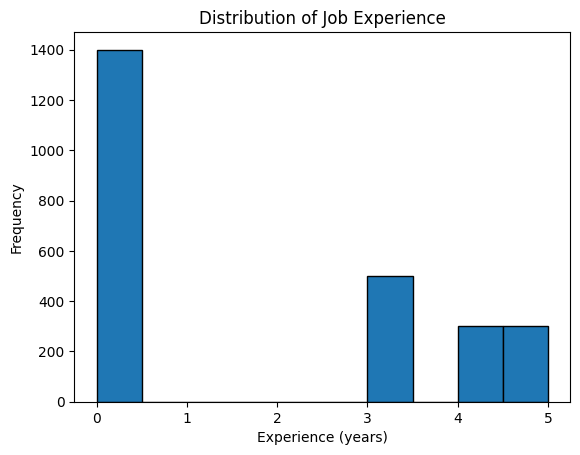

In [ ]:
import matplotlib.pyplot as plt
# plot a histogram
plt.hist(df1['Experience'], bins=10, edgecolor='k')
plt.xlabel('Experience (years)')
plt.ylabel('Frequency')
plt.title('Distribution of Job Experience')
plt.show()

We can visualize the distribution of job experience levels among the job listings. This chart can help us understand the most common experience ranges required for data science jobs.

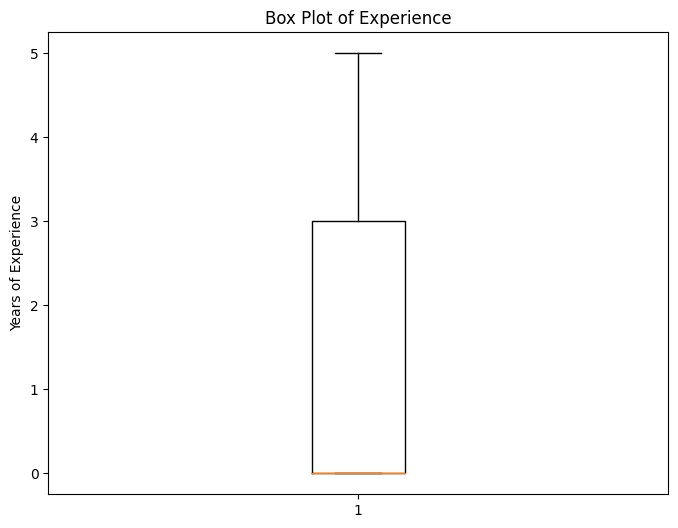

In [ ]:
# plot boxplot

plt.figure(figsize=(8, 6))
plt.boxplot(df1['Experience'])
plt.title('Box Plot of Experience')
plt.ylabel('Years of Experience')
plt.show()

By creating a box plot of maximum salaries grouped by experience levels, we can identify salary outliers, as well as the salary distribution within different experience categories.

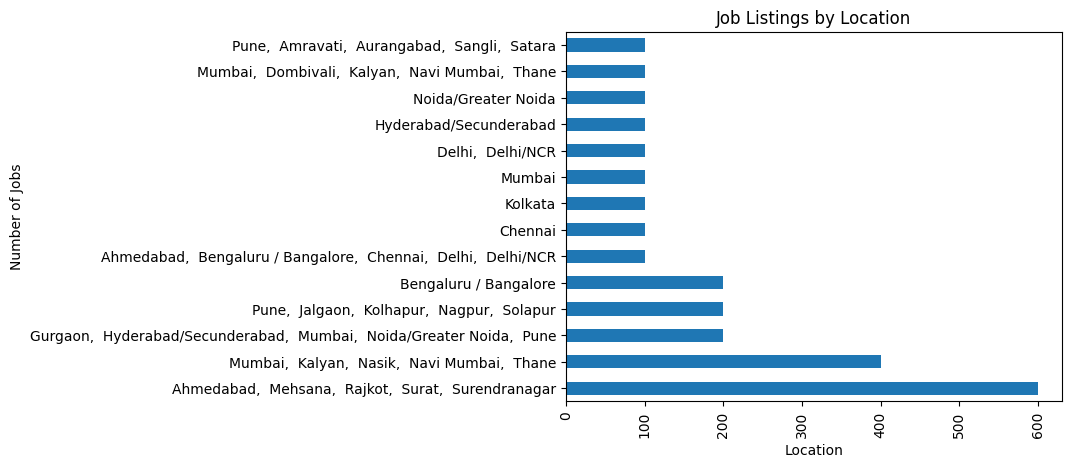

In [ ]:
# plot hbar chart
location_counts = df1['Location'].value_counts()
location_counts.plot(kind='barh')
plt.xlabel('Location')
plt.ylabel('Number of Jobs')
plt.title('Job Listings by Location')
plt.xticks(rotation=90)
plt.show()

Visualize the number of job listings in each location. This chart can help us identify which locations have the highest demand for data science jobs.

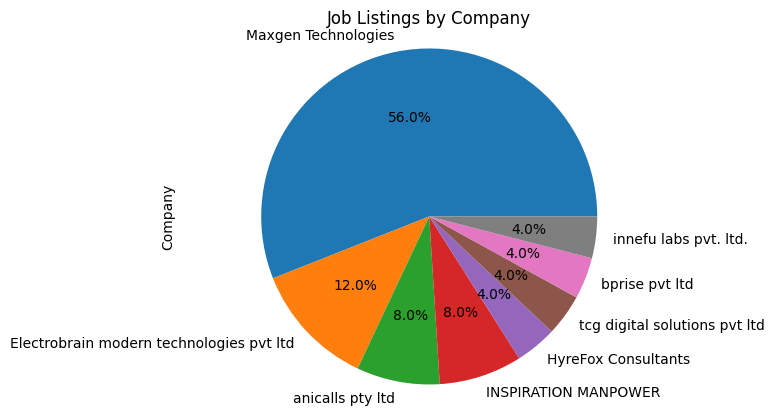

In [ ]:
# plot pie chart
company_counts = df1['Company'].value_counts()
company_counts.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Job Listings by Company')
plt.show()

Creating a pie chart to show the distribution of job listings among different companies. This will give us insights into which companies are hiring the most for data science roles.

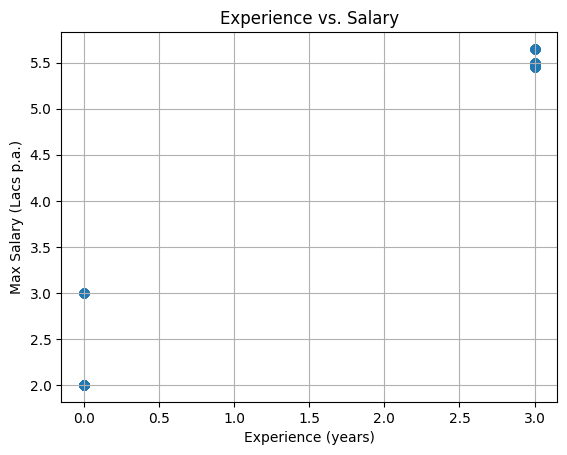

In [ ]:
# plot scatter chart
plt.scatter(df1['Experience'], df1['Salary'], alpha=0.5)
plt.xlabel('Experience (years)')
plt.ylabel('Max Salary (Lacs p.a.)')
plt.title('Experience vs. Salary')
plt.grid(True)
plt.show()

Scatter plot allows us to explore the relationship between experience and salary. We can check if there is a correlation between years of experience and salary expectations.

### visualization of job posts according to different cities

In [ ]:
# extract indivisual city names from location column

df1['Cities'] = df1['Location'].str.split(',')

# Create a new DataFrame by exploding the "Cities" column into rows
df_cities = df1.explode('Cities')

In [ ]:
df_cities.sample(10)

,Title,Company,Experience,Location,Salary,Description,Key Skills,Walk-in Details,Cities
1359,Data Science,innefu labs pvt. ltd.,4.0,"Delhi, Delhi/NCR",NaN,Job Description:\r\nLocation : DelhiDescriptio...,"procedures , data collection , Commercial...",NaN,Delhi
1479,Data Science Internship in Ahmedabad,Maxgen Technologies,0.0,"Ahmedabad, Mehsana, Rajkot, Surat, Surendr...",NaN,Job Description:\r\nMaxgen technologies pvt lt...,"Tableau , students , internship",directions_walk\nWalk-in Details 14-Sep-2023 -...,Mehsana
1230,Data Science Internship in Pune,Maxgen Technologies,0.0,"Pune, Jalgaon, Kolhapur, Nagpur, Solapur",2.00,Job Description:\r\nMaxgen technologies Pvt lt...,"jobs , freshers",directions_walk\nWalk-in Details 14-Sep-2023 -...,Pune
601,Data Science,Electrobrain modern technologies pvt ltd,3.0,"Ahmedabad, Bengaluru / Bangalore, Chennai, ...",5.65,Job Description:\r\nStrong programming skills ...,"Healthcare , Python , Provider , US Heal...",NaN,Delhi/NCR
373,Data Science Internship in Mumbai,Maxgen Technologies,0.0,"Mumbai, Kalyan, Nasik, Navi Mumbai, Thane",NaN,Job Description:\r\nMaxgen technologies pvt lt...,"Servlets , Struts , data science",directions_walk\nWalk-in Details 11-Aug-2023 -...,Thane
29,Data Science Internship in Ahmedabad,Maxgen Technologies,0.0,"Ahmedabad, Mehsana, Rajkot, Surat, Surendr...",NaN,Job Description:\r\nMaxgen technologies pvt lt...,"Tableau , students , internship",directions_walk\nWalk-in Details 14-Sep-2023 -...,Surat
1349,Data Science Internship in Ahmedabad,Maxgen Technologies,0.0,"Ahmedabad, Mehsana, Rajkot, Surat, Surendr...",NaN,Job Description:\r\nMaxgen technologies pvt lt...,"data science , Sql , students",directions_walk\nWalk-in Details 31-Jul-2023 -...,Surendranagar
2316,Data Science Internship in Mumbai,Maxgen Technologies,0.0,"Mumbai, Kalyan, Nasik, Navi Mumbai, Thane",NaN,Job Description:\r\nMaxgen Technologies Pvt Lt...,"data science , mumbai",directions_walk\nWalk-in Details 28-Aug-2023 -...,Thane
327,Data Science Trainee,Electrobrain modern technologies pvt ltd,3.0,"Gurgaon, Hyderabad/Secunderabad, Mumbai, No...",5.50,"Job Description:\r\nSelecting features , buil...",Data analysisPDFdata scienceMachine learningHe...,NaN,Hyderabad/Secunderabad
576,Data Science,Electrobrain modern technologies pvt ltd,3.0,"Ahmedabad, Bengaluru / Bangalore, Chennai, ...",5.65,Job Description:\r\nStrong programming skills ...,"Healthcare , Python , Provider , US Heal...",NaN,Bengaluru / Bangalore


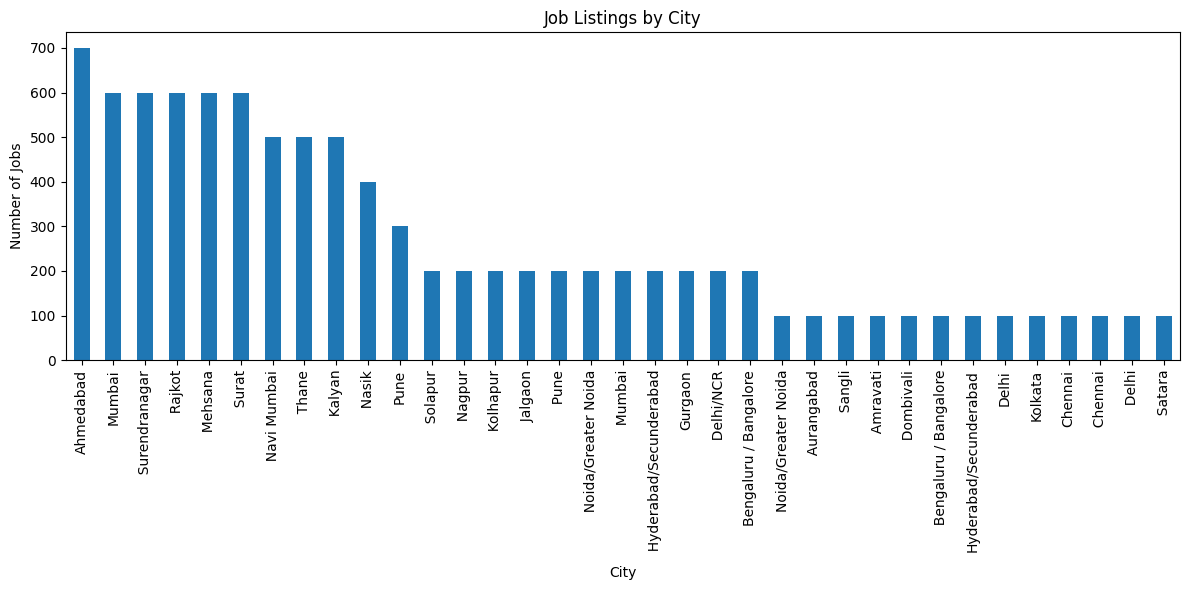

In [ ]:
# visualiz job posts according to different cities

# Get the counts of job listings for each city
city_counts = df_cities['Cities'].value_counts()

# Create a bar chart to visualize job listings by city
plt.figure(figsize=(12, 6))
city_counts.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of Jobs')
plt.title('Job Listings by City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

We can see here, the no. of job posts in different cities.